In [58]:
# Importing All Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Loading of Dataset

dataset = pd.read_csv("/content/UberDataset.csv")
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [67]:
# Data Preprocessing

dataset['PURPOSE'].fillna("NOT", inplace=True)

/tmp/ipython-input-2194409975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


In [68]:
# Changing the START_DATE and END_DATE to the date_time format

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                     errors='coerce')

In [69]:
# Converting the time into four different categories

from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [70]:
# Data Cleaning

dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

In [71]:
# Data Visualization

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

/tmp/ipython-input-593961613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY', data=dataset, palette='viridis')


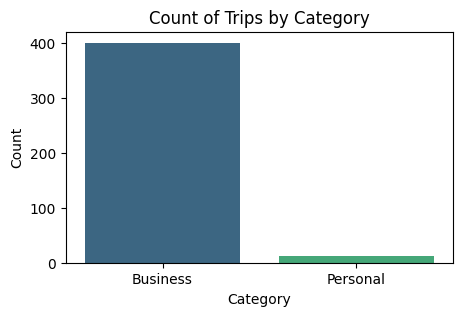

/tmp/ipython-input-593961613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='PURPOSE', data=dataset, order=dataset['PURPOSE'].value_counts().index, palette='plasma')


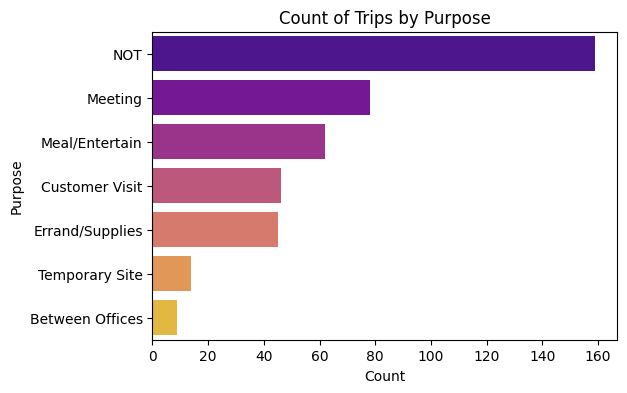

In [72]:
# Count of Trips by Category

plt.figure(figsize=(5, 3))
sns.countplot(x='CATEGORY', data=dataset, palette='viridis')
plt.title('Count of Trips by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Count of Trips by Purpose

plt.figure(figsize=(6, 4))
sns.countplot(y='PURPOSE', data=dataset, order=dataset['PURPOSE'].value_counts().index, palette='plasma')
plt.title('Count of Trips by Purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

/tmp/ipython-input-1783090028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(dataset['day-night'], palette='viridis')


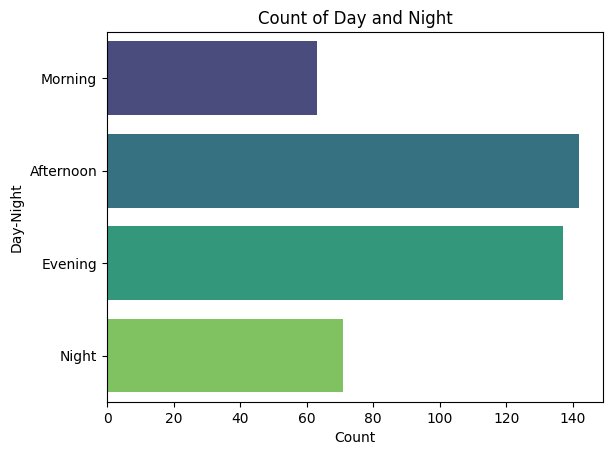

In [73]:
# Day vs Night Trip Distribution

sns.countplot(dataset['day-night'], palette='viridis')
plt.title('Count of Day and Night')
plt.xlabel('Count')
plt.ylabel('Day-Night')
plt.show()

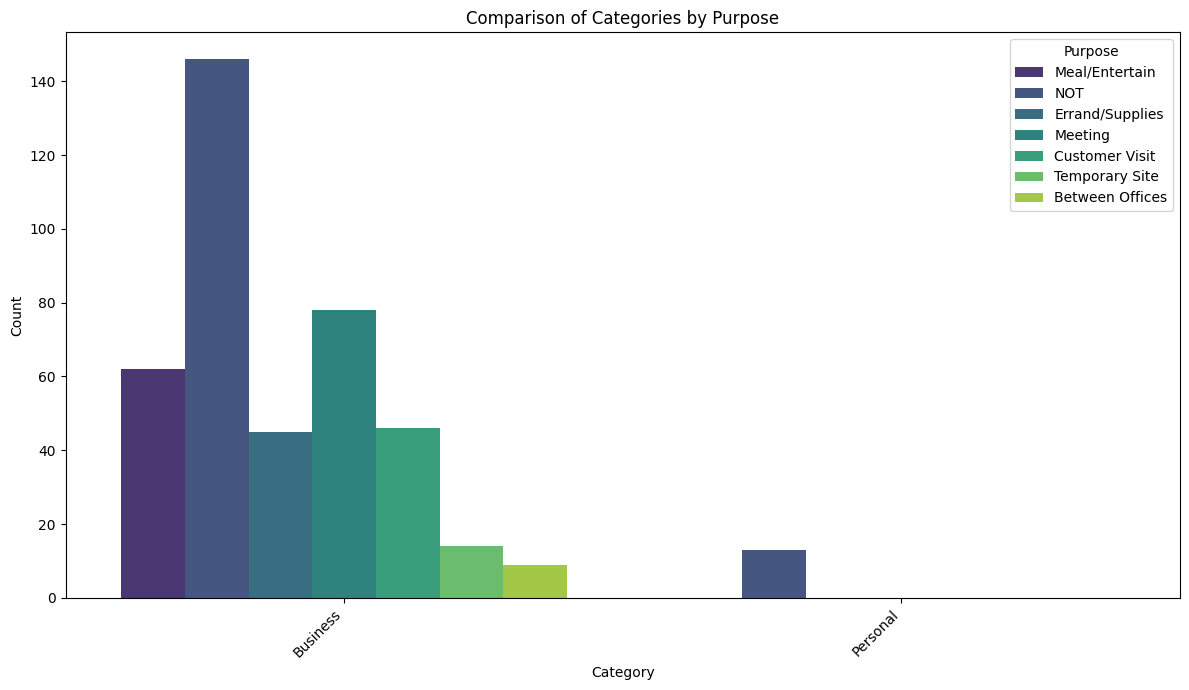

In [75]:
# Comparing the two different categories along with the PURPOSE of the user

plt.figure(figsize=(12, 7))
sns.countplot(x='CATEGORY', hue='PURPOSE', data=dataset, palette='viridis')
plt.title('Comparison of Categories by Purpose')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Purpose')
plt.tight_layout()
plt.show()

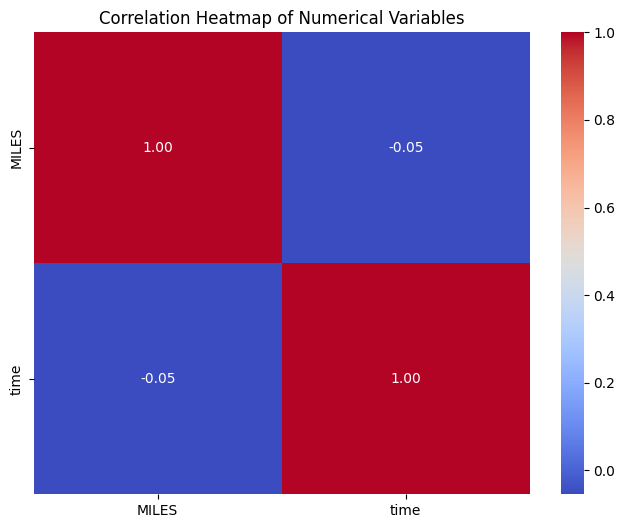

In [76]:
# Correlation Heatmap
# Select only numerical columns for correlation
numerical_cols = dataset.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

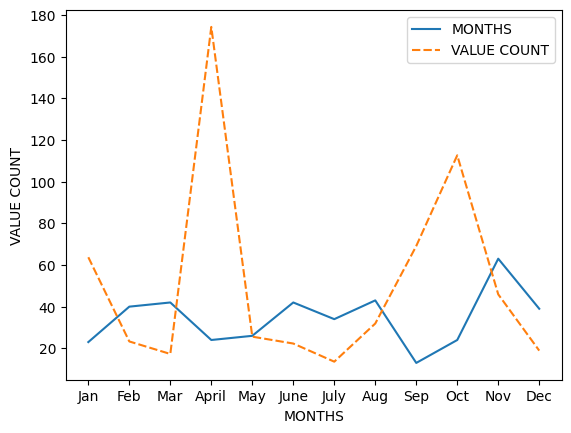

In [77]:
# To visualize the Monthly Ride Distribution

dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

Text(0, 0.5, 'COUNT')

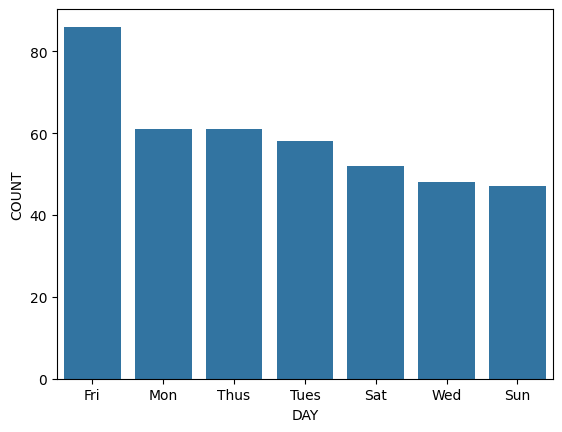

In [78]:
# To visualize the Day of Week Analysis

dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

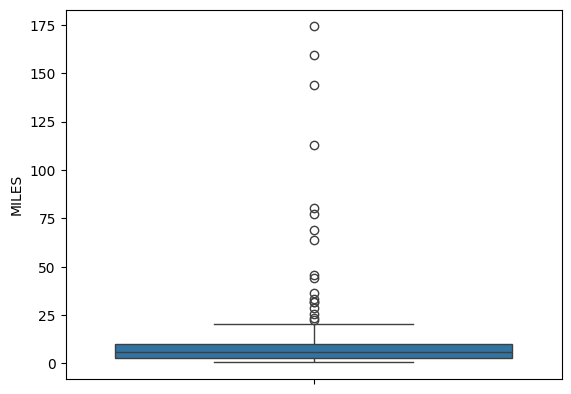

In [79]:
# boxplot to check the distribution of the column.

sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

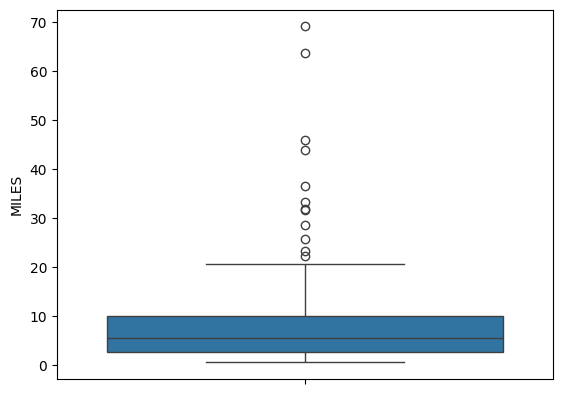

In [80]:
sns.boxplot(dataset[dataset['MILES']<70]['MILES'])

/tmp/ipython-input-1153662713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<50]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

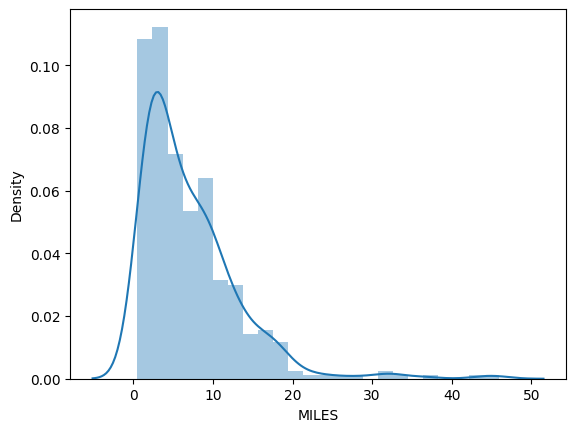

In [81]:
# use distplot for values less than 40

sns.distplot(dataset[dataset['MILES']<50]['MILES'])